<a href="https://colab.research.google.com/github/yleessam/datascience/blob/main/20%EC%B0%A8%EC%8B%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# #0. 데이터의 확인

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- 통신사 고객 데이터를 분석해서 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 탐색한다.

- Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미하는데, 목표는 기존 고객을 유지하고 새로운 고객을 유치하는 것입니다.

- 이 과정을 통해 우리는 정확한 고객이탈 예측 모델을 개발할 수 있습니다.

# * Telco Customer Churn Dataset  컬럼

---


1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

# #1. 필요 라이브러리 임포트 및 파일 읽어오기

In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

## CSV 파일 데이터 읽어오기

In [6]:
df = pd.read_csv('./data/cust_data_v1.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


CustomerID: Customer ID unique for each customer  
gender: Whether the customer is a male or a female  
SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부  
Partner: Whether the customer has a partner or not (Yes, No)  
Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부  
Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수  
PhoneService: Whether the customer has a phone service or not (Yes, No)  
MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)  
InternetService: Customer’s internet service provider (DSL, Fiber optic, No)  
OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)  
OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)  
DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)  
TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)  
StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)  
StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)  
Contract: The contract term of the customer (Month-to-month, One year, Two years)  
PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)  
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
MonthlyCharges: The amount charged to the customer monthly  
TotalCharges: The total amount charged to the customer  
Churn: Whether the customer churned or not (Yes or No) : 이탈 여부  

## 변수 분류(총 21개)
#### - 변수가 있음 변수(18개)

|변수|목록|(|Yes|or|No|)|!|
|-|-|-|-|-|-|-|-|
|'gender'|'SeniorCitizen'|'Partner'|'Dependents'|'tenure|'PhoneService'|'MultipleLines'|-|
|'OnlineSecurity'|'OnlineBackup'|'DeviceProtection'|'TechSupport'|'StreamingTV'|'StreamingMovies'|'Contract'|'PaperlessBilling'
|'Churn'|'PaymentMethod'|'InternetService'|




#### - 수치형 변수(3개)
|수치|형|변수|
|-|-|-|
|'customerID'|'MonthlyCharges'|'TotalCharges'|ect')

In [12]:
len(df.columns)

21

# #2. 탐색적 데이터 분석

## 데이터 탐색하기

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 자료구조 파악

In [25]:
df.shape

(7043, 21)

## 데이터 타입, 인덱스, 컬럼명, Values 확인

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.value_counts

<bound method DataFrame.value_counts of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG     NaN            0.0     Yes         No       1   
1     5575-GNVDE    Male            0.0      No         No      34   
2     3668-QPYBK    Male            0.0      No         No       2   
3     7795-CFOCW    Male            0.0      No         No      45   
4     9237-HQITU  Female            0.0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male            0.0     Yes        Yes      24   
7039  2234-XADUH  Female            0.0     Yes        Yes      72   
7040  4801-JZAZL  Female            0.0     Yes        Yes      11   
7041  8361-LTMKD    Male            1.0     Yes         No       4   
7042  3186-AJIEK     NaN            0.0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service         

## Null 데이터 확인

In [27]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

## 통계 정보

# #3. 데이터 전처리 수행

## 자료구조 파악

In [30]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 컬럼 삭제

In [7]:
dropcolumns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'],
dropcolumns

(['InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies'],)

In [8]:
#불필요한 컬럼 삭제
#인터넷 서비스와 관련된 통계 삭제
df_before1 = df.drop(columns = df.columns[8:15])
df_before1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 컬럼 내용 변경하기

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환한다.<br>
null, _ 같은 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경, 혹은 삭제한다.

- TotalCharges 컬럼 타입 변경하기

In [9]:
df_before1[pd.to_numeric(df_before1['TotalCharges'], errors = 'coerce').isnull()] = 0#coerce를 통해 NaN으로 전환함


In [10]:
df_before1['TotalCharges'] = df_before1['TotalCharges'].astype('float64')
df_before1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   Contract          7042 non-null   object 
 9   PaperlessBilling  7043 non-null   object 
 10  PaymentMethod     7042 non-null   object 
 11  MonthlyCharges    7042 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 770.5+ KB


In [197]:
df_before1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,NaN,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,1


- Churn 컬럼의 문자열값을 숫자로 변경

In [17]:
df_before1.loc[df_before1['Churn'] == 'Yes', 'Churn'] = 1
df_before1.loc[df_before1['Churn'] == 'No', 'Churn'] = 0

df_before1['Churn'] = df_before1['Churn'].astype('int64')
df_before1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   Contract          7042 non-null   object 
 9   PaperlessBilling  7043 non-null   object 
 10  PaymentMethod     7042 non-null   object 
 11  MonthlyCharges    7042 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 770.5+ KB


## Null 데이터 확인

In [18]:
df_before1.isnull().sum()

customerID          0
gender              9
SeniorCitizen       1
Partner             0
Dependents          2
tenure              0
PhoneService        3
MultipleLines       0
Contract            1
PaperlessBilling    0
PaymentMethod       1
MonthlyCharges      1
TotalCharges        0
Churn               0
dtype: int64

- 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 제거시 dropna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

In [19]:
#결측치를 제거함
df_before1 = df_before1.dropna()
df_before1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0.0,No,No,72,Yes,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,Month-to-month,Yes,Electronic check,29.60,346.45,0


# #4. 시각화

## 라이브러리 임포트

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

## Bar 차트

In [21]:
df_before1['Churn'].value_counts()

Churn
0    5161
1    1866
Name: count, dtype: int64

In [22]:
for i, j in enumerate(df_before1['Churn'].value_counts()):
    print(i)
    print(j)
    print('*')

0
5161
*
1
1866
*


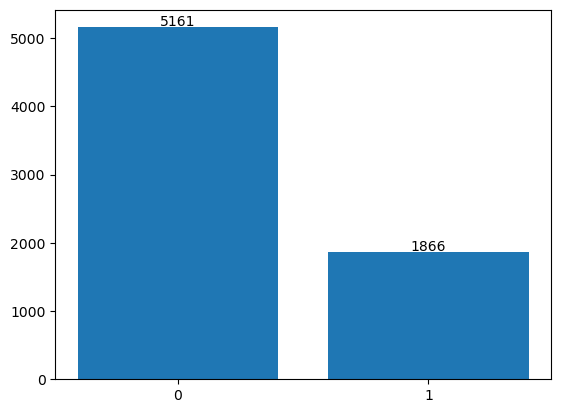

In [23]:
plt.bar(x =[0,1],
        height = df_before1['Churn'].value_counts(),
        tick_label = ['0','1']
)

for idx, i in enumerate(df_before1['Churn'].value_counts()): #레이블 표시함
    plt.text(x = idx , y = i + 20, s = i, ha = 'center') #레이블의 x는 x좌표, y는 y좌표, s는 텍스트, ha는 수평정렬
    
plt.xlabel = 'Churn'
plt.ylable = 'Counts'
plt.show()

- 불균형 심한 PhoneService 컬럼 삭제

In [275]:
#앞에서 삭제함

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

## 숫자형 컬럼에 대한 시각화

In [24]:
df_before1['Churn'].info()

<class 'pandas.core.series.Series'>
Index: 7027 entries, 1 to 7041
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7027 non-null   int64
dtypes: int64(1)
memory usage: 109.8 KB


- Churn 컬럼

In [25]:
df_before1['Churn'].describe()

count    7027.000000
mean        0.265547
std         0.441656
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [53]:
type(ratio_churn_0)

numpy.float64

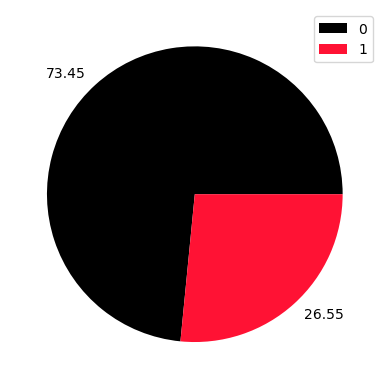

In [64]:
ratio_churn_0 = df_before1['Churn'].value_counts()[0] / df_before1['Churn'].value_counts().sum() * 100
ratio_churn_1 = df_before1['Churn'].value_counts()[1] / df_before1['Churn'].value_counts().sum() * 100
ratio_churn_0 = ratio_churn_0.round(2)
ratio_churn_1 = ratio_churn_1.round(2)

pie_colors = ['#000000', '#ff1234']

plt.pie(x = [ratio_churn_0, ratio_churn_1],
        labels = [ratio_churn_0, ratio_churn_1],
        colors = pie_colors
       )

plt.legend([0,1])


- SeniorCitizen 컬럼

In [400]:
df_before1['SeniorCitizen'] = df_before1['SeniorCitizen'].astype('int64')
df_before1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 1 to 7041
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7027 non-null   object 
 1   gender            7027 non-null   object 
 2   SeniorCitizen     7027 non-null   int64  
 3   Partner           7027 non-null   object 
 4   Dependents        7027 non-null   object 
 5   tenure            7027 non-null   int64  
 6   PhoneService      7027 non-null   object 
 7   MultipleLines     7027 non-null   object 
 8   Contract          7027 non-null   object 
 9   PaperlessBilling  7027 non-null   object 
 10  PaymentMethod     7027 non-null   object 
 11  MonthlyCharges    7027 non-null   float64
 12  TotalCharges      7027 non-null   float64
 13  Churn             7027 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 823.5+ KB


## Histgram

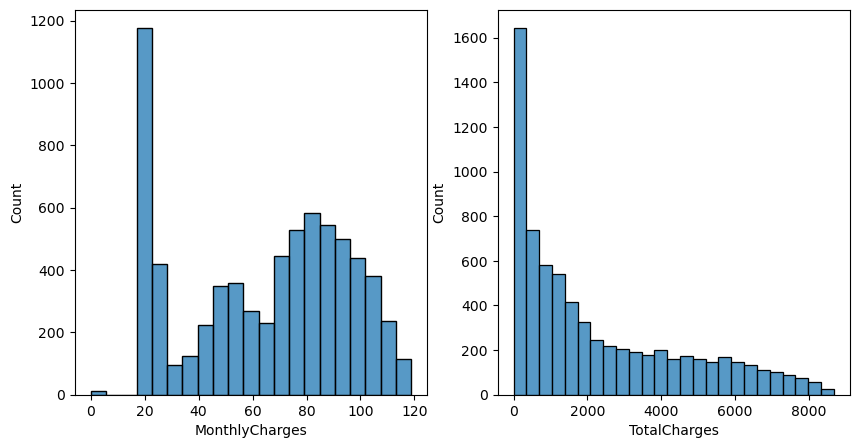

In [139]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

fig = plt.figure(figsize = (10,5))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
sns.histplot(data = df_before1['MonthlyCharges'], ax = ax0)
sns.histplot(data = df_before1['TotalCharges'], ax = ax1)
plt.show()

- tenure 컬럼

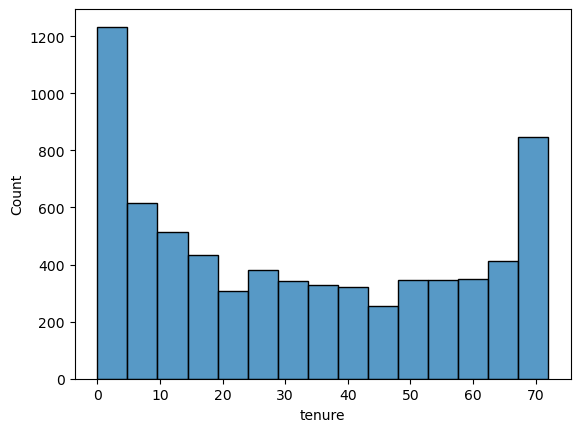

In [140]:
sns.histplot(data = df_before1['tenure'])
plt.show()

- TotalCharges 컬럼

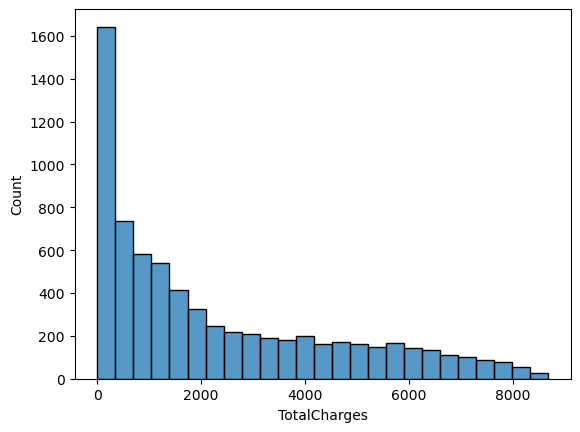

In [141]:
sns.histplot(data = df_before1['TotalCharges'])
plt.show()

## Countplot

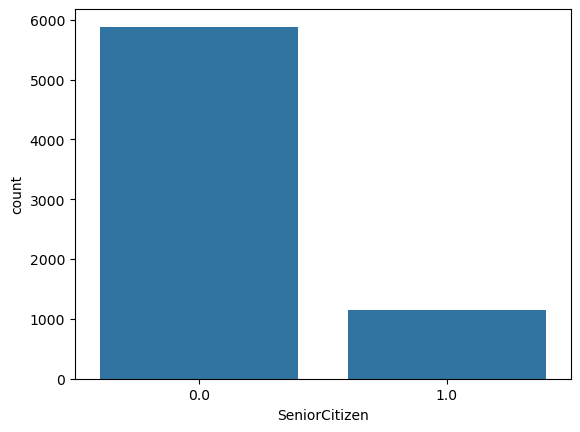

In [142]:
sns.countplot(data=df_before1, x='SeniorCitizen')
plt.show()

## heatmap

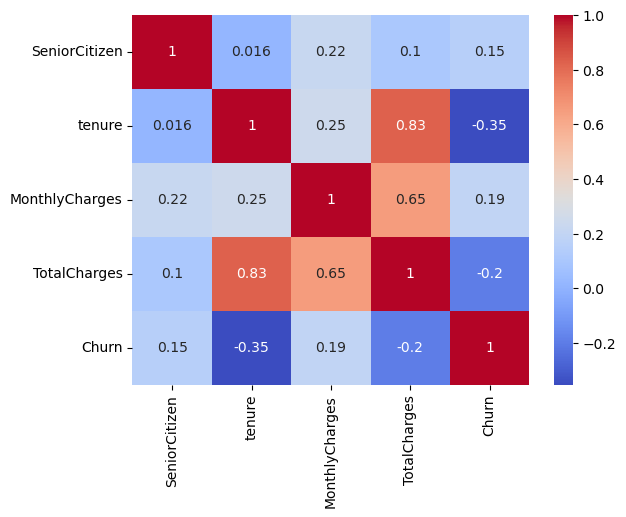

In [149]:
corr_matrix = df_before1.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(data = corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

## boxplot

<Axes: xlabel='Churn', ylabel='TotalCharges'>

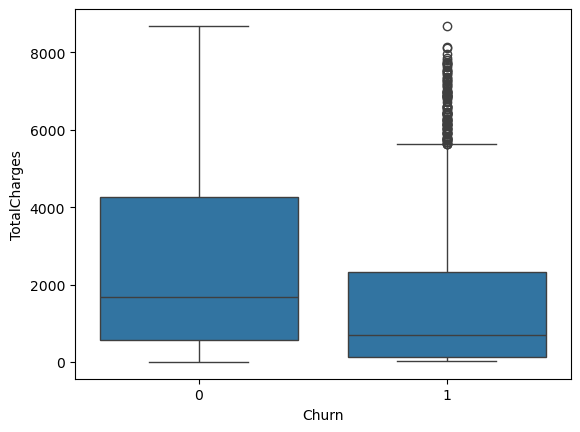

In [163]:
sns.boxplot(data = df_before1, x = 'Churn', y = 'TotalCharges')

# # 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

In [158]:
df_before1.to_csv('./data/25_data.csv', index = False)

In [165]:
pd.read_csv('./data/25_data.csv').head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5575-GNVDE,Male,0.0,No,No,34,Yes,No,One year,No,Mailed check,56.95,1889.50,0
1,3668-QPYBK,Male,0.0,No,No,2,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
2,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,One year,No,Bank transfer (automatic),42.30,1840.75,0
3,9237-HQITU,Female,0.0,No,No,2,Yes,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
4,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


# #X. 랩업
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()